In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv('/content/220824_DataClean.csv')

In [74]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Location,Price (RM),Rooms,Store,Bathrooms,Property Type,Size (sqft),Furnishing,Price/Sqft
0,45,1250000,2,1.0,3.0,16,1335.0,0,936.329588
1,27,6800000,6,0.0,7.0,9,6900.0,1,985.507246
2,31,1030000,3,0.0,4.0,12,1875.0,1,549.333333
3,16,900000,4,1.0,3.0,12,1513.0,1,594.844679
4,85,5350000,4,2.0,5.0,9,7200.0,1,743.055556


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       40345 non-null  int64  
 1   Price (RM)     40345 non-null  int64  
 2   Rooms          40345 non-null  object 
 3   Store          40222 non-null  float64
 4   Bathrooms      40345 non-null  float64
 5   Property Type  40345 non-null  int64  
 6   Size (sqft)    40345 non-null  float64
 7   Furnishing     40345 non-null  int64  
 8   Price/Sqft     40345 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.8+ MB


In [76]:
#Convert 'Rooms' to numeric
data['Rooms'] = pd.to_numeric(data['Rooms'], errors='coerce')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       40345 non-null  int64  
 1   Price (RM)     40345 non-null  int64  
 2   Rooms          39700 non-null  float64
 3   Store          40222 non-null  float64
 4   Bathrooms      40345 non-null  float64
 5   Property Type  40345 non-null  int64  
 6   Size (sqft)    40345 non-null  float64
 7   Furnishing     40345 non-null  int64  
 8   Price/Sqft     40345 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


In [78]:
data.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Location,Price (RM),Rooms,Store,Bathrooms,Property Type,Size (sqft),Furnishing,Price/Sqft
count,40345.000000,4.034500e+04,39700.000000,40222.000000,40345.000000,40345.000000,40345.000000,40345.000000,4.034500e+04
mean,42.679341,1.836693e+06,3.318589,0.440232,3.132928,11.402107,2201.808601,0.841666,inf
std,22.770045,8.357539e+06,1.307989,0.553042,1.664132,4.426022,10115.035617,0.660051,NaN
min,0.000000,3.080000e+02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.756098e-01
25%,23.000000,6.000000e+05,3.000000,0.000000,2.000000,9.000000,876.000000,0.000000,5.156250e+02
50%,45.000000,1.000000e+06,3.000000,0.000000,3.000000,12.000000,1259.000000,1.000000,7.462687e+02
75%,54.000000,2.000000e+06,4.000000,1.000000,4.000000,16.000000,2142.000000,1.000000,1.163919e+03
max,97.000000,1.600000e+09,18.000000,2.000000,20.000000,17.000000,820000.000000,3.000000,inf


In [79]:
#Check missing data
data.isnull().sum()

,0
Location,0
Price (RM),0
Rooms,645
Store,123
Bathrooms,0
Property Type,0
Size (sqft),0
Furnishing,0
Price/Sqft,0


In [80]:
#Handle missing data 'Store'
data['Store'].fillna(0, inplace=True)

In [81]:
#Handle infinite values in 'Price/Sqft'
data = data[data['Price/Sqft'] != np.inf]

In [82]:
#Drop any missing values in any rows
data.dropna(inplace=True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39616 entries, 0 to 40344
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       39616 non-null  int64  
 1   Price (RM)     39616 non-null  int64  
 2   Rooms          39616 non-null  float64
 3   Store          39616 non-null  float64
 4   Bathrooms      39616 non-null  float64
 5   Property Type  39616 non-null  int64  
 6   Size (sqft)    39616 non-null  float64
 7   Furnishing     39616 non-null  int64  
 8   Price/Sqft     39616 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.0 MB


In [84]:
data.describe()

,Location,Price (RM),Rooms,Store,Bathrooms,Property Type,Size (sqft),Furnishing,Price/Sqft
count,39616.000000,3.961600e+04,39616.000000,39616.000000,39616.000000,39616.000000,39616.000000,39616.000000,3.961600e+04
mean,42.750858,1.849778e+06,3.319038,0.445805,3.164706,11.334208,2190.087692,0.850565,7.865142e+03
std,22.752301,8.395630e+06,1.307776,0.554300,1.644656,4.428024,9238.904235,0.657529,1.344016e+05
min,0.000000,3.080000e+02,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.756098e-01
25%,23.000000,6.000000e+05,3.000000,0.000000,2.000000,9.000000,901.000000,0.000000,5.128205e+02
50%,45.000000,1.030000e+06,3.000000,0.000000,3.000000,12.000000,1272.000000,1.000000,7.388913e+02
75%,54.000000,2.000000e+06,4.000000,1.000000,4.000000,15.000000,2174.000000,1.000000,1.151826e+03
max,97.000000,1.600000e+09,18.000000,2.000000,20.000000,17.000000,820000.000000,3.000000,2.600000e+07


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
# Select features and target variable
X = data[['Location', 'Rooms', 'Store', 'Bathrooms', 'Property Type', 'Size (sqft)', 'Furnishing']]
y = data['Price (RM)']

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [90]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Output
print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 2965880286096.728
R²: 0.466499903558228


In [91]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(1344670005769.5264, 0.7581218698801506)

In [93]:
import xgboost as xgb

# Train an XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [94]:
# Make predictions on the test set
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mse_xgb, r2_xgb

(2448796727339.4956, 0.5595124670654663)

In [95]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [96]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model's performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt

(4626701783332.245, 0.1677527042524165)

In [97]:
#Comparing model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Assume y_test is the true values and y_pred_* are predictions from different models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R²: {r2}\n")

# Train a Linear Regression model and make predictions (if you haven't already)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Example: Comparing models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

Linear Regression Performance:
  MSE: 2965880286096.728
  RMSE: 1722173.128955602
  MAE: 943962.0092235263
  R²: 0.466499903558228

Random Forest Performance:
  MSE: 1344670005769.5264
  RMSE: 1159599.0711317107
  MAE: 332048.2828009473
  R²: 0.7581218698801506

XGBoost Performance:
  MSE: 2448796727339.4956
  RMSE: 1564863.1656919706
  MAE: 422538.85600908444
  R²: 0.5595124670654663

Decision Tree Performance:
  MSE: 4626701783332.245
  RMSE: 2150976.936959633
  MAE: 418554.4205384946
  R²: 0.1677527042524165



In [98]:
#Compare between training and testing performance
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Set a threshold for acceptable difference (example: 0.1)
threshold = 0.1

if test_score > train_score - threshold:
    print(f"Model {model_name} generalizes well")

Model Decision Tree generalizes well


In [99]:
#Determine the best model
models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgboost_model,
    'Decision Tree': dt_model
}

best_model = None
best_r2 = -float('inf')

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model_name

print(f"The best model is {best_model} with R²: {best_r2}")

The best model is Random Forest with R²: 0.7581218698801506


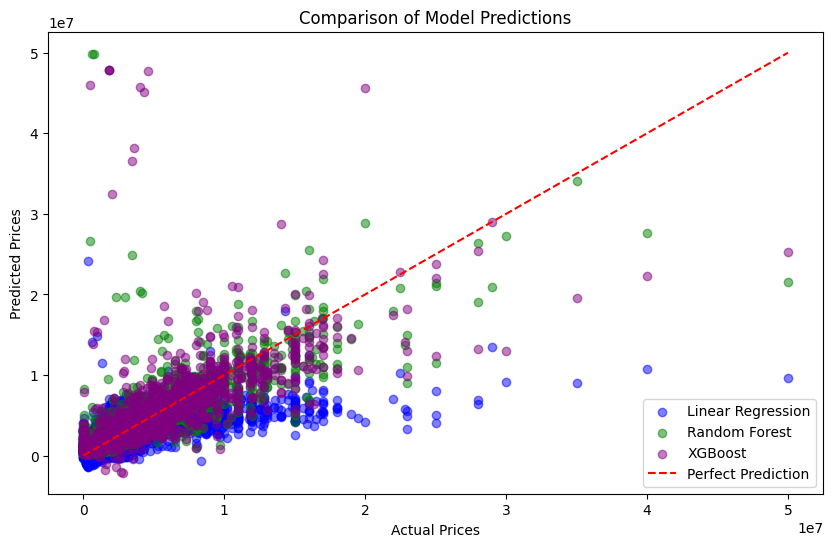

In [100]:
#Comparison of model predictions
plt.figure(figsize=(10, 6))

# Plot Linear Regression predictions
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Linear Regression')

# Plot Random Forest predictions
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Random Forest')

# Plot XGBoost predictions
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='purple', label='XGBoost')

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()